# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [4]:
# Sua análise da parte 1 começa aqui.
dataframe.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


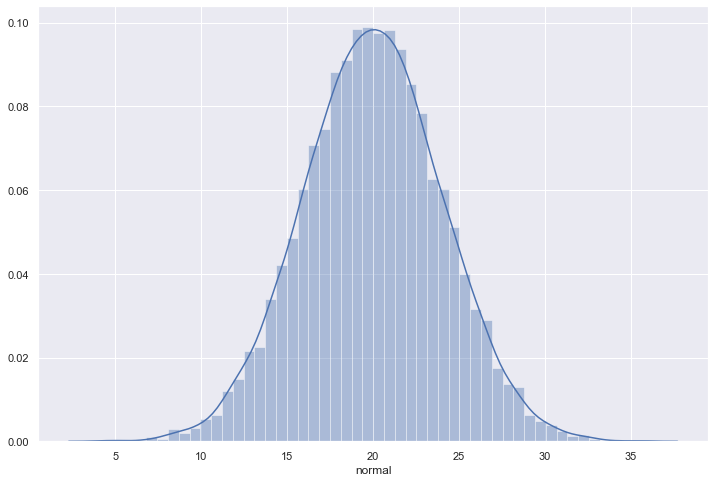

In [22]:
sns.distplot(dataframe.normal);


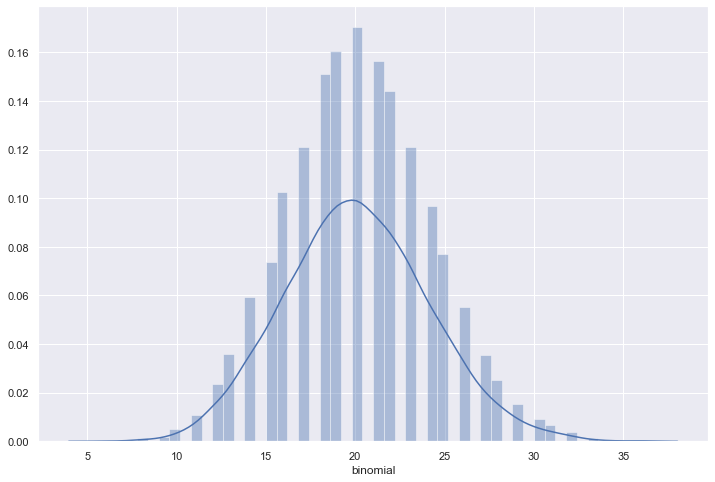

In [23]:
sns.distplot(dataframe.binomial);


## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [14]:
def q1():
    q1_norm = dataframe.normal.quantile(0.25)
    q2_norm = dataframe.normal.quantile(0.5)
    q3_norm = dataframe.normal.quantile(0.75)
    q1_binom = dataframe.binomial.quantile(0.25)
    q2_binom = dataframe.binomial.quantile(0.5)
    q3_binom = dataframe.binomial.quantile(0.75)
    # Retorne aqui o resultado da questão 1.
    return(round((q1_norm - q1_binom),3), round((q2_norm - q2_binom),3), round((q3_norm - q3_binom),3))


Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [54]:
def q2():
    s = dataframe.normal.std()
    x = dataframe.normal.mean()
    intervalo = [x-s,x+s]
    #print(intervalo)
    return float(round(ECDF(dataframe.normal)(intervalo[1])- ECDF(dataframe.normal)(intervalo[0]),3))
    #print(sct.norm.cdf(intervalo,loc=x,scale=s))
    # Retorne aqui o resultado da questão 2.


Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [28]:
def q3():
    m_binom = dataframe.binomial.mean()
    v_binom = dataframe.binomial.var()
    m_norm = dataframe.normal.mean()
    v_norm = dataframe.normal.var()    
    # Retorne aqui o resultado da questão 3.
    return (round((m_binom - m_norm),3),round((v_binom - v_norm),3))

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [31]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [32]:
# Sua análise da parte 2 começa aqui.
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [57]:
stars['target'].replace({False:0,True:1},inplace=True)



In [58]:
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


In [78]:
stars.shape

(17897, 9)

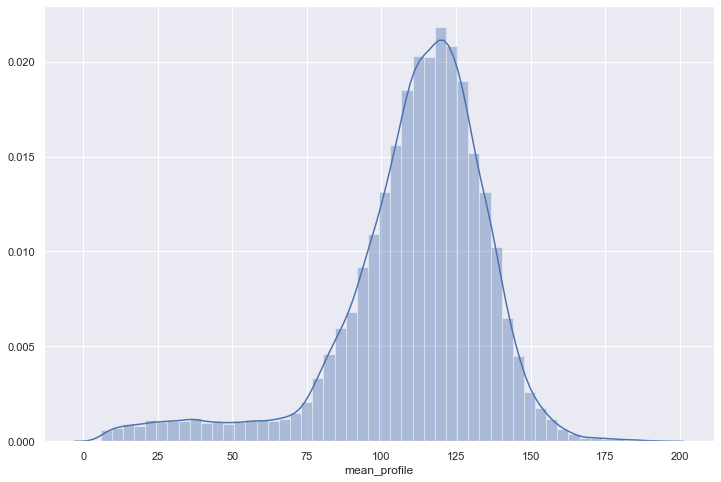

In [76]:
sns.distplot(stars.mean_profile)

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [62]:
dado = stars[stars['target']==0]['mean_profile']
dado.mean()

116.56125013454914

In [71]:
dado = stars[stars['target']==0]['mean_profile']
mean_profile = dado.mean()
std_profile = dado.std()
false_pulsar_mean_profile_standardized = (dado-mean_profile)/std_profile

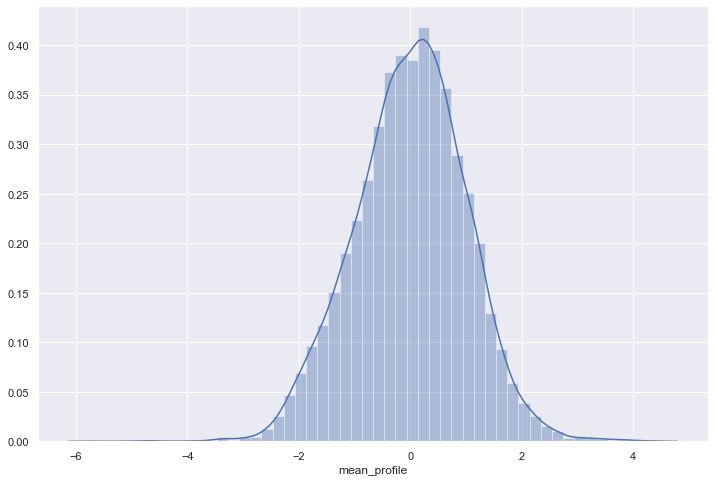

In [75]:
sns.distplot(false_pulsar_mean_profile_standardized)

In [90]:
def q4():
    ecdf = ECDF(false_pulsar_mean_profile_standardized)
    profile_80 = ecdf(sct.norm.ppf(0.8,0,1))
    profile_90 = ecdf(sct.norm.ppf(0.9,0,1))
    profile_95 = ecdf(sct.norm.ppf(0.95,0,1))
    return(round(profile_80,3),round(profile_90,3),round(profile_95,3))
    # Retorne aqui o resultado da questão 4.



Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [92]:
def q5():
    q1_pulsar = false_pulsar_mean_profile_standardized.quantile(0.25)
    q2_pulsar = false_pulsar_mean_profile_standardized.quantile(0.5)
    q3_pulsar = false_pulsar_mean_profile_standardized.quantile(0.75)
    q1 = q1_pulsar - sct.norm.ppf(0.25,0,1)
    q2 = q2_pulsar - sct.norm.ppf(0.5,0,1)
    q3 = q3_pulsar - sct.norm.ppf(0.75,0,1)
    
    # Retorne aqui o resultado da questão 5.
    return(round(q1,3),round(q2,3),round(q3,3))